In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import datetime as dt

In [2]:
data = pd.read_csv('../../../../../../Users/kanoksak/Desktop/Tableau/MHCI/mhci.csv', parse_dates=['data_create'])


<ipython-input-2-ea1691178a36>:1: DtypeWarning: Columns (3,4,5,6,8,9,10,14,39,40,41,43,44,87,91,95,96) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../../../../../../Users/kanoksak/Desktop/Tableau/MHCI/mhci.csv', parse_dates=['data_create'])


In [3]:
df=data #ถ่ายโอนข้อมูล
df.shape

(3689936, 102)

In [4]:
df['data_create'] = pd.to_datetime(df['data_create'],infer_datetime_format=True)

In [5]:
df=df.loc[(df['data_create']>='2021-10-01')]
df.shape

(1382341, 102)

In [6]:

df.head()

,id,data_create,type,group_taker,name_taker,surname_taker,gender_taker,age_taker,position_taker,work_taker,...,person,group_data,family,doctor,departments,other,c_trace,trace,contact,ok
631939,1739321,2021-10-01 00:00:00,2,อสม.,มณี,เฉยบรรดิษฐ,หญิง,56,อสม.,บ้าน,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
631940,1739322,2021-10-01 00:03:00,2,อสม.,มณี,เฉยบรรดิษฐ,หญิง,56,อสม.,บ้าน,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
631941,1739323,2021-10-01 00:05:00,1,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
631942,1739324,2021-10-01 00:16:34,1,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
631943,1739325,2021-10-01 00:17:12,1,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# df=df[['gender','people_type','age','rq1','rq2'
# ,'rq3','st_5']] 

df=df[['age','rq1','rq2'
,'rq3','st_5']] 

df.head()

,age,rq1,rq2,rq3,st_5
631939,54,9,9,9,0
631940,50,10,10,10,0
631941,56,10,10,10,0
631942,39,5,7,5,14
631943,24,6,10,10,0


In [8]:
df.isna().sum()

age     0
rq1     0
rq2     0
rq3     0
st_5    0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

age     0
rq1     0
rq2     0
rq3     0
st_5    0
dtype: int64

In [11]:
df = df.drop(df[(df.age < 0) | (df.age > 100)].index)

In [12]:
df['age'].max()

100

In [13]:
df['age'].min()

0

In [14]:
df.shape

(1382270, 5)

In [23]:
#df.groupby(['gender']).count()

In [24]:
#df.groupby(['people_type']).count()

In [25]:
#df=df.loc[(df['people_type'] == "ประชาชน") | (df['people_type'] == "อสม") | (df['people_type'] == "เจ้าหน้าที่สาธารณสุข")| (df['people_type'] == "เจ้าหน้าที่หน่วยงานสังกัดอื่น")| (df['people_type'] == "บุคคลากรทางการศึกษา")| (df['people_type'] == "พระภิกษุ/สามเณร/นักบวช/ผู้นำศาสนา")| (df['people_type'] == "ผู้สัมผัสเสี่ยงสูง")]

In [26]:
#df.groupby(['people_type']).count()

In [27]:
# df.loc[df["gender"] == "ประชาชนชาย", "gender"] = "ชาย"
# df.loc[df["gender"] == "ประชาชนหญิ", "gender"] = "หญิง"
# df.groupby(['gender']).count()

In [15]:
df1_1= df.loc[df['st_5'] >=8]
for i in range(1000):
    df1_2 = df1_1.take(np.random.permutation(len(df1_1))[:36400])

In [16]:
df1_2.shape

(36400, 5)

In [17]:
df2_1= df.loc[df['st_5'] <8]
for i in range(1000):
    df2_2 = df2_1.take(np.random.permutation(len(df2_1))[:36400])

In [18]:
df2_2.shape

(36400, 5)

In [19]:
df=df1_2.append(df2_2)
df.shape

<ipython-input-19-925d04d78cd0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1_2.append(df2_2)


(72800, 5)

In [20]:
df.to_csv('data.csv', index=False)

In [34]:

# dummies = pd.get_dummies(df['gender'])
# df = pd.concat([df, dummies], axis = 1)
# df

In [35]:

# dummies = pd.get_dummies(df['people_type'])
# df = pd.concat([df, dummies], axis = 1)
# df

In [21]:
# sex = {'หญิง':0 , 'ชาย':1}          #แปลงค่าเพศ
# df['gender'] = \
#     df['gender'].apply(sex.get)  
# df['gender'] = df['gender'].fillna(df['gender'].mean()) #แทนค่าว่างด้วยค่าเฉลี่ย   

# people_type = {'ประชาชน':0 , 'อสม':1 , 'เจ้าหน้าที่สาธารณสุข':2 , 'เจ้าหน้าที่หน่วยงานสังกัดอื่น':3 , 'บุคคลากรทางการศึกษา':4 , 'พระภิกษุ/สามเณร/นักบวช/ผู้นำศาสนา':5 , 'ผู้สัมผัสเสี่ยงสูง':6 , 'เจ้าหน้าที่เรือนจำ/ทัณฑสถาน':7 , 'ผู้ต้องราชทัณฑ์':8}        
# df['people_type'] = \
#     df['people_type'].apply(people_type.get)  
# df['people_type'] = \
#     df['people_type']=df['people_type'].div(df['people_type'].max()) 
# df['people_type'] = df['people_type'].fillna(df['people_type'].mean()) #แทนค่าว่างด้วยค่าเฉลี่ย   


df['age'] = \
    df['age']=df['age'].div(df['age'].max())   #แปลงค่าอายุ
df['age'] = df['age'].fillna(df['age'].mean()) #แทนค่าว่างด้วยค่าเฉลี่ย    

df['rq1'] = \
    df['rq1']=df['rq1'].div(df['rq1'].max()) #rq ข้อ 1
df['rq1'] = df['rq1'].fillna(df['rq1'].mean()) #แทนค่าว่างด้วยค่าเฉลี่ย  

df['rq2'] = \
    df['rq2']=df['rq2'].div(df['rq2'].max()) #rq ข้อ 1
df['rq2'] = df['rq2'].fillna(df['rq2'].mean()) #แทนค่าว่างด้วยค่าเฉลี่ย  

df['rq3'] = \
    df['rq3']=df['rq3'].div(df['rq3'].max()) #rq ข้อ 1
df['rq3'] = df['rq3'].fillna(df['rq3'].mean()) #แทนค่าว่างด้วยค่าเฉลี่ย  


df['st_5'] = df['st_5'].fillna(0) #แทนค่าว่างด้วยค่า0
df.loc[df['st_5'] < 8, 'st_5_len'] = 'False' 
df.loc[df['st_5'] >= 8, 'st_5_len'] = 'True' 

df2=df[['st_5_len']]  #เลือกข้อมูล test

df.head()


,age,rq1,rq2,rq3,st_5,st_5_len
2324597,0.19,0.7,0.9,0.4,8,True
3448650,0.57,0.6,0.5,0.5,8,True
2891954,0.19,0.2,0.2,0.3,11,True
3575205,0.51,0.1,0.2,0.3,11,True
2497004,0.17,0.6,0.6,0.7,10,True


In [22]:
#X=df[['gender','people_type','age','province_id']]  #เลือกข้อมูล train
X=df.drop('st_5', 1)
X=X.drop('st_5_len', 1)
# X=X.drop('people_type', 1)
# X=X.drop('gender', 1)
X[0:50]

<ipython-input-22-81b0c2936568>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df.drop('st_5', 1)
<ipython-input-22-81b0c2936568>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('st_5_len', 1)


,age,rq1,rq2,rq3
2324597,0.19,0.7,0.9,0.4
3448650,0.57,0.6,0.5,0.5
2891954,0.19,0.2,0.2,0.3
3575205,0.51,0.1,0.2,0.3
2497004,0.17,0.6,0.6,0.7
3412026,0.28,0.6,0.6,0.8
3611646,0.19,1.0,1.0,1.0
1896117,0.47,0.2,0.1,0.2
3162217,0.24,0.5,0.5,0.7
2599318,0.40,0.1,0.8,0.3


In [23]:
df2[0:10]

,st_5_len
2324597,True
3448650,True
2891954,True
3575205,True
2497004,True
3412026,True
3611646,True
1896117,True
3162217,True
2599318,True


In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72800 entries, 2324597 to 3647231
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     72800 non-null  float64
 1   rq1     72800 non-null  float64
 2   rq2     72800 non-null  float64
 3   rq3     72800 non-null  float64
dtypes: float64(4)
memory usage: 2.8 MB


In [25]:
Y = pd.get_dummies(df2).values #แปลงค่า dummies
print(Y[0:10])

[[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]


In [26]:
np.array(X)

array([[0.19, 0.7 , 0.9 , 0.4 ],
       [0.57, 0.6 , 0.5 , 0.5 ],
       [0.19, 0.2 , 0.2 , 0.3 ],
       ...,
       [0.59, 0.8 , 0.7 , 0.8 ],
       [0.69, 0.9 , 1.  , 1.  ],
       [0.62, 0.9 , 0.9 , 0.9 ]])

In [27]:
Y.shape

(72800, 2)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [29]:
x_train.shape

(58240, 4)

In [30]:
x_test.shape

(14560, 4)

In [31]:
x_train.head()

,age,rq1,rq2,rq3
3653380,0.32,0.1,0.3,0.3
3056904,0.19,0.2,0.2,0.3
2518598,0.43,1.0,1.0,1.0
3116762,0.66,0.5,0.5,0.5
3273514,0.32,0.8,0.9,0.9


In [34]:
x_test.head()

,age,rq1,rq2,rq3
2769879,0.55,0.6,0.6,0.7
2732443,0.60,0.8,0.8,0.8
2938367,0.35,0.7,0.7,0.7
3124273,0.53,0.8,0.9,0.8
2816785,0.25,0.1,0.8,0.5


In [35]:
y_train

array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [36]:
y_test

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]], dtype=uint8)

In [46]:
x_test= np.array(x_test) #แปลงเป็น Array
x_train= np.array(x_train) #แปลงเป็น Array

In [47]:
# 4-100-100-3
inputs = keras.Input(shape=(4,))
d1 = layers.Dense(100, activation='relu')
d2 = layers.Dense(100, activation='relu')
d3 = layers.Dense(100, activation='relu')
d4 = layers.Dense(2)
outputs = d4(d3(d2(d1(inputs))))
model = keras.Model(inputs, outputs)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss=keras.losses.MeanSquaredError())


In [48]:
model.fit(x_train, y_train, epochs=300)


Epoch 1/300
1820/1820 [==============================] - 7s 3ms/step - loss: 0.1544
Epoch 2/300
1820/1820 [==============================] - 6s 3ms/step - loss: 0.1268
Epoch 3/300
1820/1820 [==============================] - 6s 3ms/step - loss: 0.1247
Epoch 4/300
1820/1820 [==============================] - 6s 3ms/step - loss: 0.1230
Epoch 5/300
1820/1820 [==============================] - 6s 3ms/step - loss: 0.1217
Epoch 6/300
1820/1820 [==============================] - 6s 3ms/step - loss: 0.1206
Epoch 7/300
1820/1820 [==============================] - 6s 3ms/step - loss: 0.1198
Epoch 8/300
1820/1820 [==============================] - 6s 3ms/step - loss: 0.1189
Epoch 9/300
1820/1820 [==============================] - 6s 3ms/step - loss: 0.1185
Epoch 10/300
1820/1820 [==============================] - 6s 3ms/step - loss: 0.1180
Epoch 11/300
1820/1820 [==============================] - 6s 3ms/step - loss: 0.1175
Epoch 12/300
1820/1820 [==============================] - 6s 3ms/step - lo

In [49]:

model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


In [50]:
Z = model.predict(x_test)
tf.argmax(Z,axis=1)

455/455 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(14560,), dtype=int64, numpy=array([1, 0, 0, ..., 0, 0, 1])>

In [51]:
_model = keras.models.load_model("my_model")
Z = _model.predict(x_test)
tf.argmax(Z,axis=1)

455/455 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(14560,), dtype=int64, numpy=array([1, 0, 0, ..., 0, 0, 1])>

In [52]:
tf.argmax(y_test, axis=1)

<tf.Tensor: shape=(14560,), dtype=int64, numpy=array([0, 0, 0, ..., 0, 0, 1])>

In [53]:
np.sum(tf.argmax(Z, axis=1) == tf.argmax(y_test, axis=1)) / len(Z)

0.8473214285714286

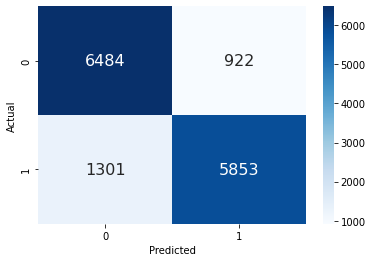

In [54]:
d = {'Z': tf.argmax(Z, axis=1), 'Y': tf.argmax(y_test, axis=1)}
df = pd.DataFrame(data=d )
confusion_matrix = pd.crosstab(df['Y'],df['Z'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='g')
plt.show()